In [147]:
using ImageIO, FileIO, ImageShow, Colors, Plots, StatsBase, LinearAlgebra, FFTW

In [470]:
raw = convert(Array{Float64}, convert(Array{Gray}, load("testing/raw.png")))
oneGS = convert(Array{Float64}, convert(Array{Gray}, load("testing/oneGS.png")))
oneGSLOW = convert(Array{Float64}, convert(Array{Gray}, load("testing/oneGSLOW.png")))
oneGSHigh = convert(Array{Float64}, convert(Array{Gray}, load("testing/oneGSHigh.png")))
oneGS70 = convert(Array{Float64}, convert(Array{Gray}, load("testing/oneGS70.png")))
one = convert(Array{RGB{Float64}}, load("testing/one.png"));
twoGS7575 = convert(Array{Float64}, convert(Array{Gray}, load("testing/twoGS7575.png")))
twoGS7565 = convert(Array{Float64}, convert(Array{Gray}, load("testing/twoGS7565.png")))
twoGS7540 = convert(Array{Float64}, convert(Array{Gray}, load("testing/twoGS7540.png")))
twoGS7590 = convert(Array{Float64}, convert(Array{Gray}, load("testing/twoGS7590.png")))
twoGS9075 = convert(Array{Float64}, convert(Array{Gray}, load("testing/twoGS7590.png")))
twoGS7770 = convert(Array{Float64}, convert(Array{Gray}, load("testing/twoGS7770.png")))
two7575 = convert(Array{RGB{Float64}}, load("testing/two7575.png"));

In [93]:
typeof(one)

Matrix{RGB{Float64}} (alias for Array{RGB{Float64}, 2})

In [94]:
dump(red(one[1,1]))

Float64 0.2627450980392157


In [95]:
dump(green(one[1,1]))

Float64 0.29411764705882354


In [96]:
dump(blue(one[1,1]))

Float64 0.23529411764705882


In [97]:
typeof(red.(one))

Matrix{Float64} (alias for Array{Float64, 2})

In [98]:
red.(one)

4032×3024 Matrix{Float64}:
 0.262745  0.262745  0.270588  0.27451   …  0.278431  0.270588  0.266667
 0.266667  0.270588  0.27451   0.27451      0.278431  0.270588  0.266667
 0.282353  0.278431  0.27451   0.27451      0.278431  0.270588  0.266667
 0.290196  0.286275  0.278431  0.27451      0.27451   0.27451   0.270588
 0.294118  0.286275  0.286275  0.282353     0.27451   0.27451   0.27451
 0.290196  0.286275  0.286275  0.282353  …  0.27451   0.27451   0.27451
 0.290196  0.290196  0.290196  0.290196     0.27451   0.27451   0.278431
 0.286275  0.290196  0.290196  0.290196     0.27451   0.27451   0.278431
 0.305882  0.305882  0.309804  0.301961     0.262745  0.266667  0.27451
 0.305882  0.309804  0.309804  0.301961     0.270588  0.270588  0.27451
 0.309804  0.305882  0.309804  0.301961  …  0.282353  0.278431  0.278431
 0.301961  0.309804  0.305882  0.301961     0.286275  0.286275  0.278431
 0.294118  0.301961  0.309804  0.309804     0.286275  0.286275  0.278431
 ⋮                          

In [75]:
size(one)

(4032, 3024)

In [87]:
reinterpret(Float64, one)

12096×3024 reinterpret(Float64, ::Array{RGB{Float64},2}):
 0.262745  0.262745  0.270588  0.27451   …  0.278431  0.270588  0.266667
 0.294118  0.294118  0.294118  0.298039     0.278431  0.270588  0.266667
 0.235294  0.235294  0.239216  0.243137     0.278431  0.270588  0.266667
 0.266667  0.270588  0.27451   0.27451      0.278431  0.270588  0.266667
 0.298039  0.301961  0.298039  0.298039     0.278431  0.270588  0.266667
 0.239216  0.243137  0.243137  0.243137  …  0.278431  0.270588  0.266667
 0.282353  0.278431  0.27451   0.27451      0.278431  0.270588  0.266667
 0.305882  0.301961  0.298039  0.298039     0.278431  0.270588  0.266667
 0.25098   0.247059  0.25098   0.25098      0.270588  0.262745  0.258824
 0.290196  0.286275  0.278431  0.27451      0.27451   0.27451   0.270588
 0.313725  0.309804  0.301961  0.298039  …  0.278431  0.27451   0.27451
 0.258824  0.254902  0.254902  0.25098      0.258824  0.266667  0.254902
 0.294118  0.286275  0.286275  0.282353     0.27451   0.27451   0.2

In [5]:
length(raw)

12192768

In [6]:
length(raw[1])

1

In [7]:
for i=1:8:3024
    print(i)
end

1917253341495765738189971051131211291371451531611691771851932012092172252332412492572652732812892973053133213293373453533613693773853934014094174254334414494574654734814894975055135215295375455535615695775855936016096176256336416496576656736816896977057137217297377457537617697777857938018098178258338418498578658738818898979059139219299379459539619699779859931001100910171025103310411049105710651073108110891097110511131121112911371145115311611169117711851193120112091217122512331241124912571265127312811289129713051313132113291337134513531361136913771385139314011409141714251433144114491457146514731481148914971505151315211529153715451553156115691577158515931601160916171625163316411649165716651673168116891697170517131721172917371745175317611769177717851793180118091817182518331841184918571865187318811889189719051913192119291937194519531961196919771985199320012009201720252033204120492057206520732081208920972105211321212129213721452153216121692177218521932201220922172225223322412249225722652273

In [8]:
function epq(img, p, q)
    irange = 1:8:4032-8
    jrange = 1:8:3024-8
    out = 0
    for i = irange
        for j = jrange
            out += abs(img[i+p,j+q]-img[i+p,j+q+1]-img[i+p+1,j+q]+img[i+p+1,j+q+1])
        end
    end
    return out
end;

In [9]:
function determine_origin(img)
    x = 0:7
    y = 0:7
    X = repeat(reshape(x, 1, :), length(y), 1)
    Y = repeat(y, 1, length(x))
    function inner(p,q)
        return(epq(img,p,q))
    end
    Z = map(inner, X, Y)
    return heatmap(0:7, 0:7, Z, c=cgrad([:blue, :cyan]), size = (800, 800))
end

determine_origin (generic function with 1 method)

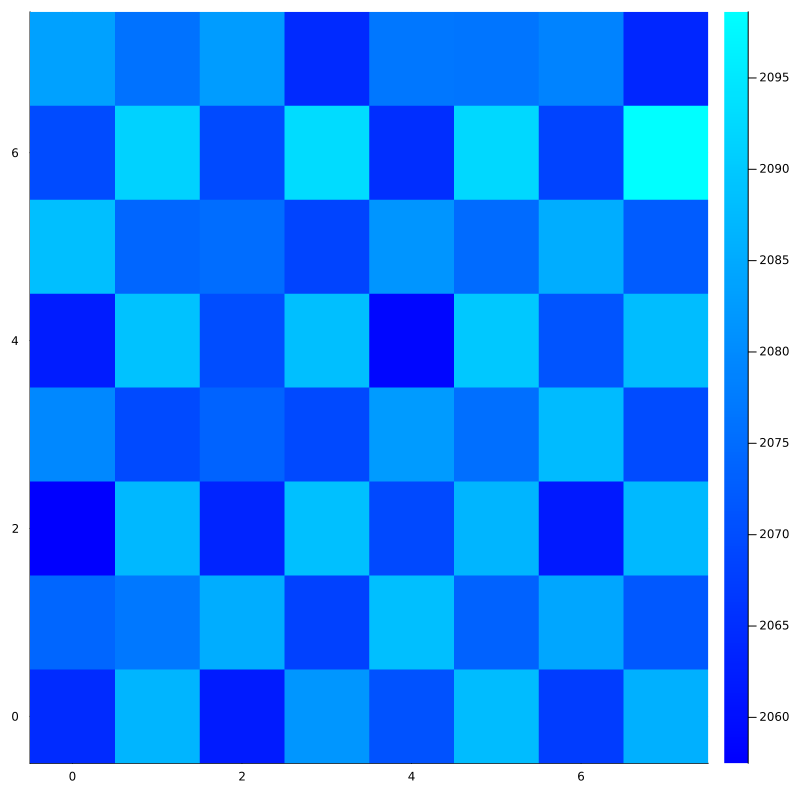

In [10]:
determine_origin(raw)

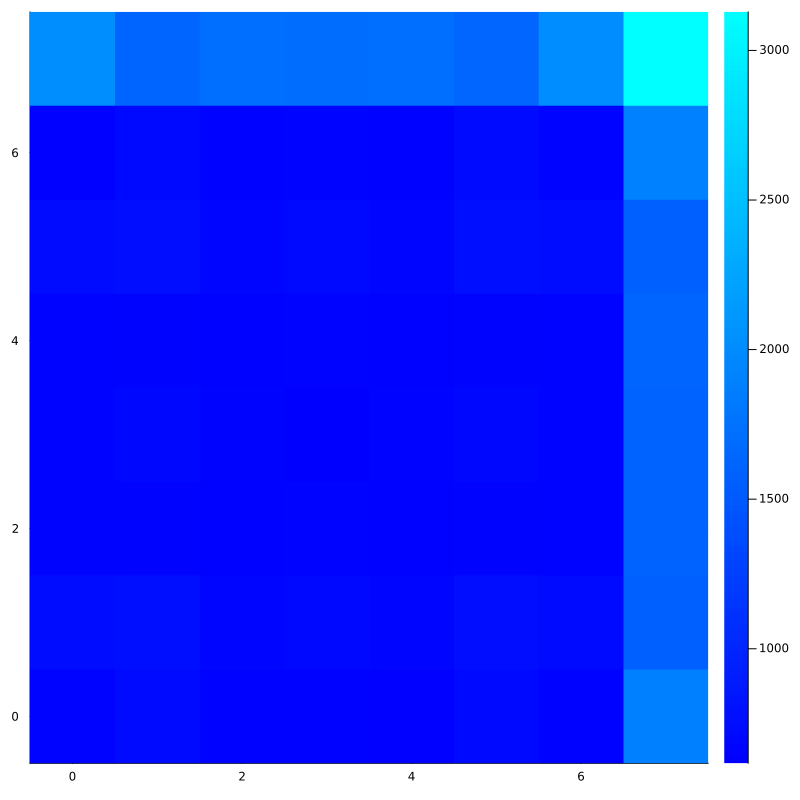

In [11]:
determine_origin(oneGS)

In [12]:
function get_Z1(img,p,q)
    out = []
    irange = p:8:4032-8
    jrange = q:8:3024-8
    for i = irange
        for j = jrange
            t = abs(img[i+3,j+3]-img[i+3,j+4]-img[i+4,j+3]+img[i+4,j+4])
            append!(out,t)
        end
    end
    return out
end;
function get_Z2(img,p,q)
    out = []
    irange = p:8:4032-8
    jrange = q:8:3024-8
    for i = irange
        for j = jrange
            t = abs(img[i+7,j+7]-img[i+7,j+8]-img[i+8,j+7]+img[i+8,j+8])
            append!(out,t)
        end
    end
    return out
end;

In [504]:
function zHistogram(img,p,q)
    h1 = get_Z1(img,p,q)
    h2 = get_Z2(img,p,q)
    histogram(h1, normalize=:probability, bins=100, ylabel="Probability", xlabel = "Neighbour Differences")
    histogram!(h2, normalize=:probability, bins=100)
end

zHistogram (generic function with 1 method)

In [477]:
size(get_Z1(raw,1,1))

(189631,)

In [492]:
using StatsPlots

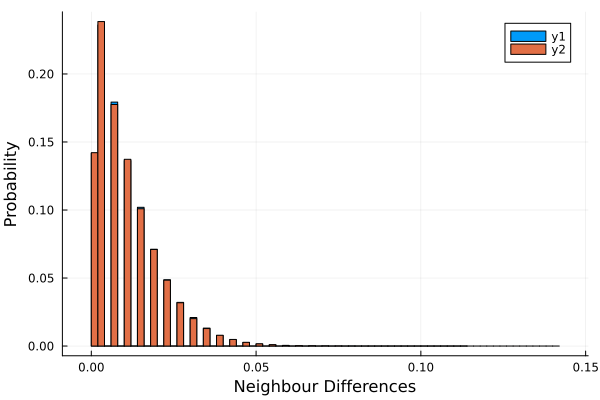

In [505]:
zHistogram(raw,1,1)

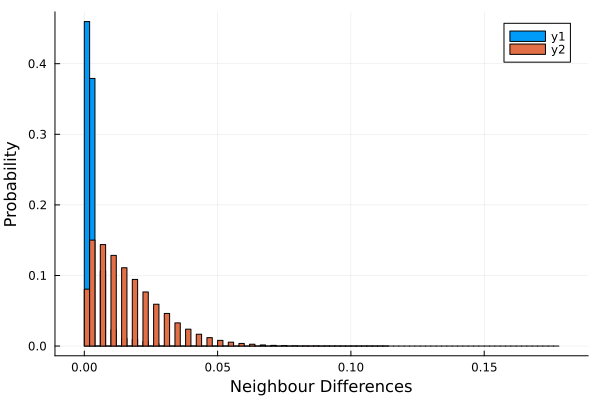

In [506]:
zHistogram(oneGS,1,1)

In [26]:
function get_K(img,p,q)
    h1 = convert(Vector{Float64}, get_Z1(img,p,q))
    h2 = convert(Vector{Float64}, get_Z2(img,p,q))
    h1SB = normalize(fit(Histogram, h1, 0:0.005:0.25), mode=:probability)
    h2SB = normalize(fit(Histogram, h2, 0:0.005:0.25), mode=:probability)
    return plot(abs.(h2SB.weights-h1SB.weights), ylim=(-0.1, 1), xlim=(0,50)),sum(abs.(h2SB.weights-h1SB.weights))
end

get_K (generic function with 1 method)

0.009555399697306882


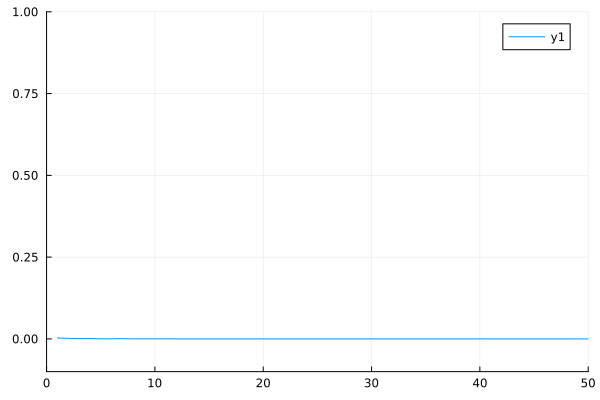

In [502]:
rawAbsDiff,k = get_K(raw,1,1)
println(k)
rawAbsDiff

1.2163412100342244


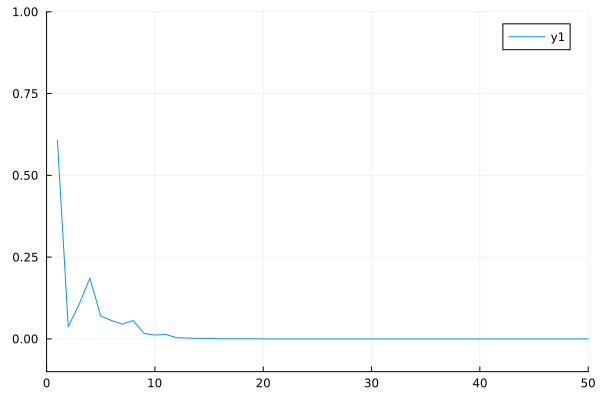

In [503]:
oneAbsDiff,k = get_K(oneGS,1,1)
println(k)
oneAbsDiff

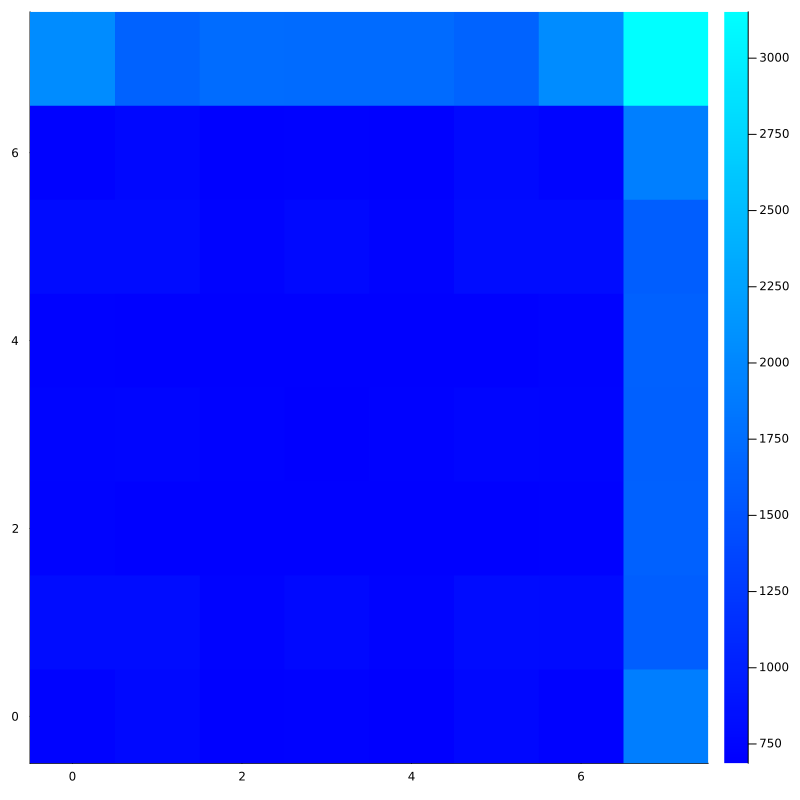

In [101]:
determine_origin(green.(one))

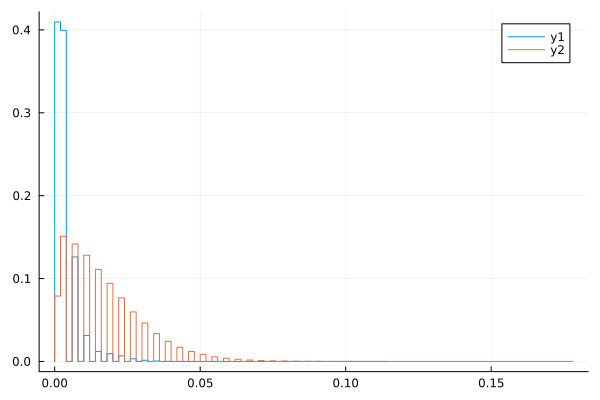

In [107]:
zHistogram(green.(one),1,1)

1.1584603783136722


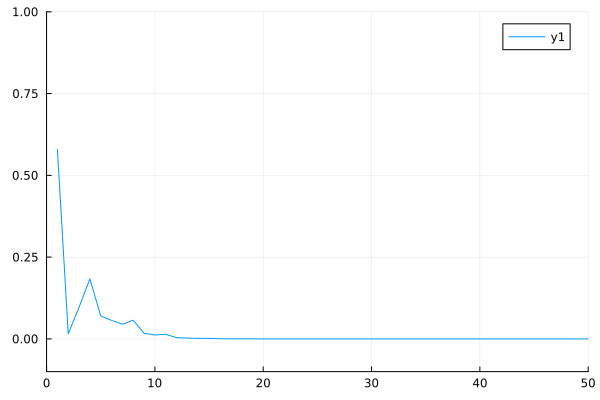

In [106]:
oneCAbsDiff,k = get_K(green.(one),1,1)
println(k)
oneCAbsDiff

In [31]:
test1 = transpose(convert(Array{Float64}, convert(Array{Gray}, load("test1.png"))))
test1c = transpose(load("test1c.png"));
test2 = convert(Array{Float64}, convert(Array{Gray}, load("test2.png")))
test2c = load("test2c.png");
test3 = convert(Array{Float64}, convert(Array{Gray}, load("test3.png")))
test3c = load("test3c.png");

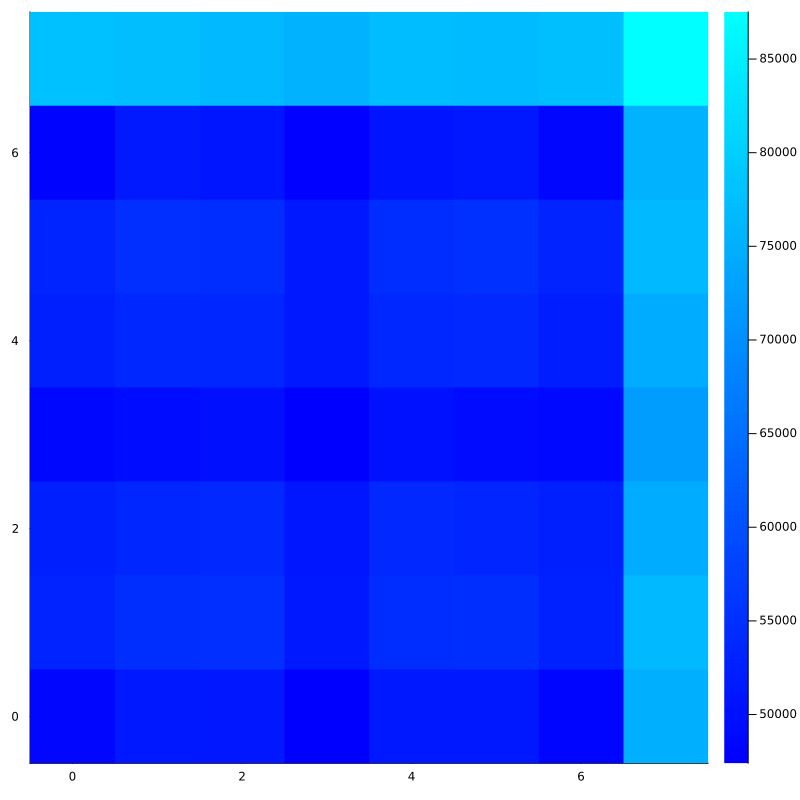

In [124]:
determine_origin(green.(test2c))

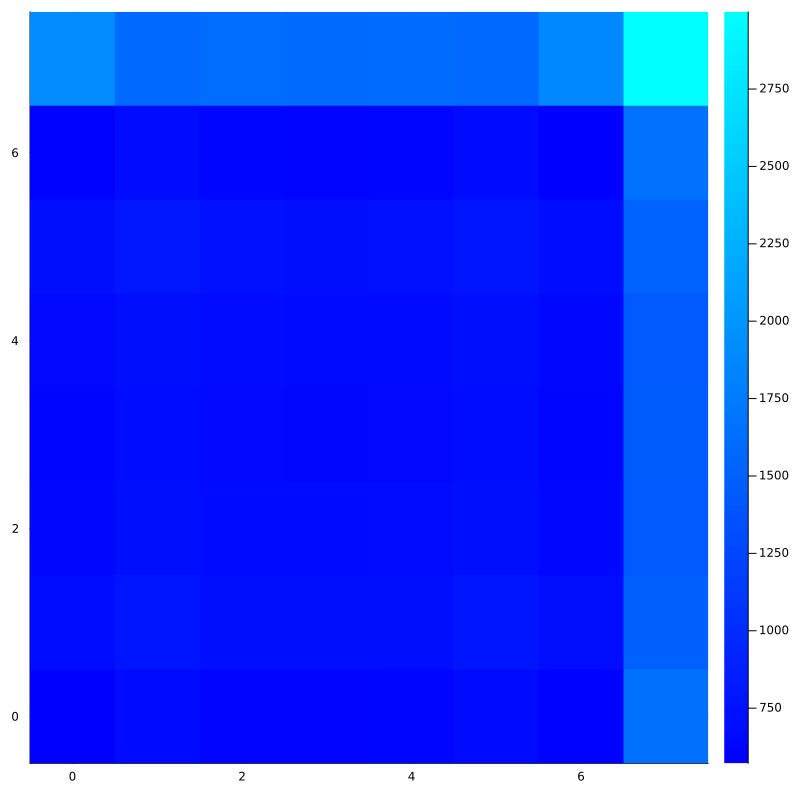

In [123]:
determine_origin(test3)

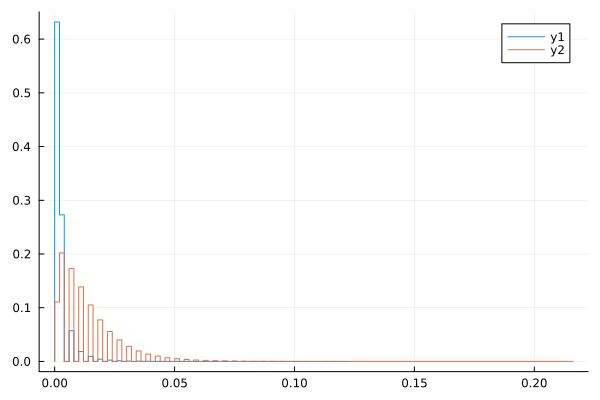

In [41]:
zHistogram(test2,1,1)

0.007674370320079288


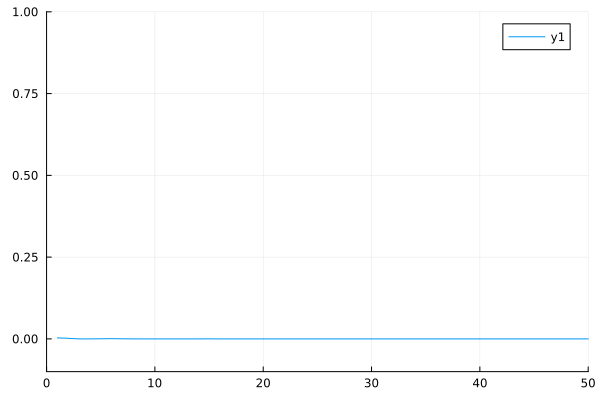

In [484]:
testAbsDiff,k = get_K(test1,1,1)
println(k)
testAbsDiff

In [127]:
# Create an 8x8 matrix of zeros
dct_matrix = zeros(8, 8)

# Fill in the matrix with the DCT base vectors
for u in 0:7
    for v in 0:7
        cu = sqrt(1/8)
        cv = sqrt(1/8)
        if u != 0
            cu = sqrt(2/8)
        end
        if v != 0
            cv = sqrt(2/8)
        end
        dct_matrix[u+1, v+1] = cu * cv * cos((pi/8)*(2*u+1)*v) * cos((pi/8)*(2*v+1)*u)
    end
end

In [128]:
dct_matrix

8×8 Matrix{Float64}:
  0.125         0.16332       0.125        …  -0.125        -0.16332
  0.16332       0.0366117     0.0676495        0.0676495    -0.0883883
  0.125         0.0676495     0.125           -0.125         0.0676495
  0.0676495     0.213388      0.16332          0.16332       0.0883883
  1.08245e-17   4.24285e-17   5.41223e-17      1.73301e-16  -6.22427e-16
 -0.0676495    -0.0883883     0.16332      …   0.16332      -0.0366117
 -0.125         0.0676495    -0.125            0.125         0.0676495
 -0.16332      -0.0883883     0.0676495        0.0676495     0.213388

In [132]:
function generate_base_vectors(image)
    base_vectors = []
    for i in 0:div(size(image, 1), 8)-1
        for j in 0:div(size(image, 2), 8)-1
            block = image[i*8+1:i*8+8, j*8+1:j*8+8]
            dct_coefs = dct_matrix * block
            push!(base_vectors, dct_coefs)
        end
    end
    return base_vectors
end

generate_base_vectors (generic function with 1 method)

In [130]:
white_img = Float64.(ones(8,8))

8×8 Matrix{Float64}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [135]:
base_vectors = generate_base_vectors(white_img)

1-element Vector{Any}:
 [0.12500000000000006 0.12500000000000006 … 0.12500000000000006 0.12500000000000006; 0.3718427003494595 0.3718427003494595 … 0.3718427003494595 0.3718427003494595; … ; 0.33693976625564437 0.33693976625564437 … 0.33693976625564437 0.33693976625564437; 0.14875534972363885 0.14875534972363885 … 0.14875534972363885 0.14875534972363885]

In [140]:
base_vectors[1]

8×8 Matrix{Float64}:
  0.125        0.125        0.125       …   0.125        0.125
  0.371843     0.371843     0.371843        0.371843     0.371843
  0.58694      0.58694      0.58694         0.58694      0.58694
  0.821067     0.821067     0.821067        0.821067     0.821067
 -5.3513e-16  -5.3513e-16  -5.3513e-16     -5.3513e-16  -5.3513e-16
  0.435768     0.435768     0.435768    …   0.435768     0.435768
  0.33694      0.33694      0.33694         0.33694      0.33694
  0.148755     0.148755     0.148755        0.148755     0.148755

In [141]:
idct_matrix = zeros(8, 8)
for x in 0:7
    for y in 0:7
        cx = sqrt(1/8)
        cy = sqrt(1/8)
        if x != 0
            cx = sqrt(2/8)
        end
        if y != 0
            cy = sqrt(2/8)
        end
        idct_matrix[x+1, y+1] = cx * cy * cos((pi/8)*x*(2*y+1)) * cos((pi/8)*y*(2*x+1))
    end
end

In [142]:
idct_matrix

8×8 Matrix{Float64}:
  0.125         0.16332       0.125        …  -0.125        -0.16332
  0.16332       0.0366117     0.0676495        0.0676495    -0.0883883
  0.125         0.0676495     0.125           -0.125         0.0676495
  0.0676495     0.213388      0.16332          0.16332       0.0883883
  1.08245e-17   4.24285e-17   5.41223e-17      1.73301e-16  -6.22427e-16
 -0.0676495    -0.0883883     0.16332      …   0.16332      -0.0366117
 -0.125         0.0676495    -0.125            0.125         0.0676495
 -0.16332      -0.0883883     0.0676495        0.0676495     0.213388

8×8 Matrix{Float64}:
  0.109375     0.0612451     0.046875     …  -0.046875    -0.0612451
  0.0612451    0.0983265     0.0373274       -0.00350267  -0.0175206
  0.046875     0.0373274     0.109375         0.015625    -0.00350267
  0.0253686    0.0331456     0.0492863        0.0323739    0.0110485
  1.1367e-16   1.03189e-16  -8.43635e-17     -5.7275e-17  -1.10746e-16
 -0.0253686    0.0110485     0.0323739    …   0.0492863    0.0331456
 -0.046875    -0.00350267    0.015625         0.109375     0.0373274
 -0.0612451   -0.0175206    -0.00350267       0.0373274    0.0983265

In [148]:
dct(white_img)

8×8 Matrix{Float64}:
 8.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [166]:
dct(raw[1:8,1:8])

8×8 Matrix{Float64}:
  2.33578     -0.00800549   0.0121046   …  -0.000238629   0.0113877
 -0.00954859  -0.0268721    0.00621713     -0.0120763     0.0131023
 -0.01785      0.00718752  -0.0345474      -0.0015649     0.00316466
  0.0113143   -0.00778443  -0.0142322       0.0104913    -0.00557082
  0.00147059   0.0179252   -0.00154624      0.000109888  -0.00475954
  0.0083518   -0.00966009  -0.00284136  …  -0.00330007   -0.00120884
  0.00686312  -0.00946487  -0.00744725      0.00219444   -0.00179782
  0.00442656   0.00167404  -0.00508867     -0.00312078   -7.43033e-5

In [167]:
dct(raw[1:8,1:8])[1,3]

0.0121045981073753

In [363]:
function dct_coeffs(img,m,n)
    irange = 1:8:4032-8
    jrange = 1:8:3024-8
    out = []
    for i = irange
        for j = jrange
            x = img[i:i+7,j:j+7]
            x .*= 255
            x .-= 128
            append!(out,dct(x)[m,n])
        end
    end
    return out
end;

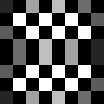

In [364]:
x = [
    0 0 0 0 0 0 0 0;
    0 0 0 0 0 0 0 0;
    0 0 0 0 0 0 0 0;
    0 0 0 0 0 0 0 0;
    0 0 0 0 0 0 0 0;
    0 0 0 0 0 0 0 0;
    0 0 0 0 0 0 0 8;
    0 0 0 0 0 0 0 0;
]
convert(Array{Gray},idct(x))

In [523]:
test = dct_coeffs(oneGS,1,1)
test = [i for i in test if (abs(i) < 50 && i!=0)]

18611-element Vector{Float64}:
 -47.75000000000001
 -48.00000000000001
  -0.25000000000000006
 -24.000000000000004
   0.12500000000000003
 -39.75000000000001
 -23.875000000000004
 -31.375000000000004
  24.25
 -32.375
 -48.5
 -47.87500000000001
 -39.75000000000001
   ⋮
  -0.12500000000000003
   0.5000000000000001
  -8.000000000000002
   0.6250000000000001
   0.37500000000000006
  -8.125
   8.000000000000002
 -31.500000000000004
  -0.12500000000000003
  -8.125
  -8.000000000000002
 -40.5

In [409]:
coeffs = dct_coeffs(raw,1,2);

In [410]:
minimum(coeffs)

-434.87059666524425

In [411]:
#coeffs = [x for x in coeffs if abs(x) < 0.5];

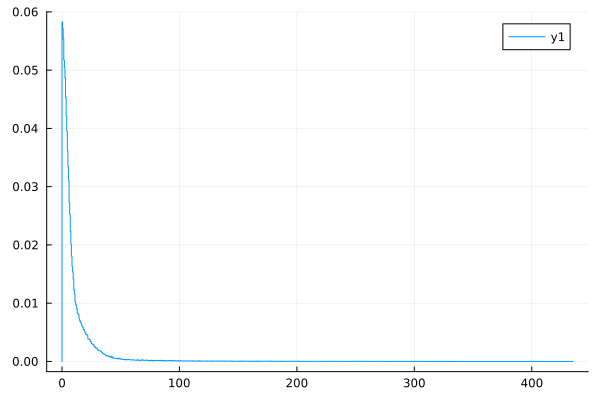

In [413]:
stephist(abs.(coeffs), normalize=:probability, bins=1000)

In [369]:
raw1 = raw[1:8,1:8]
raw1 .*= 255
raw1 .-= 128

8×8 Matrix{Float64}:
 -57.0  -56.0  -55.0  -54.0  -49.0  -52.0  -53.0  -55.0
 -55.0  -56.0  -56.0  -58.0  -53.0  -57.0  -53.0  -53.0
 -53.0  -55.0  -57.0  -57.0  -52.0  -54.0  -49.0  -51.0
 -51.0  -52.0  -54.0  -56.0  -56.0  -56.0  -51.0  -49.0
 -50.0  -52.0  -52.0  -53.0  -55.0  -55.0  -54.0  -50.0
 -53.0  -56.0  -52.0  -51.0  -53.0  -53.0  -54.0  -48.0
 -54.0  -53.0  -52.0  -53.0  -53.0  -53.0  -54.0  -54.0
 -52.0  -52.0  -53.0  -54.0  -53.0  -54.0  -58.0  -59.0

In [370]:
dct(raw1)

8×8 Matrix{Float64}:
 -428.375    -2.0414     3.08667   …  -1.20934    -0.0608504   2.90386
   -2.43489  -6.85237    1.58537      -0.489838   -3.07946     3.34109
   -4.55175   1.83282   -8.80958      -1.78827    -0.399049    0.80699
    2.88514  -1.98503   -3.62921       0.259126    2.67529    -1.42056
    0.375     4.57093   -0.39429      -0.557377    0.0280213  -1.21368
    2.12971  -2.46332   -0.724547  …   0.236208   -0.841519   -0.308254
    1.7501   -2.41354   -1.89905       0.338808    0.559582   -0.458445
    1.12877   0.426881  -1.29761      -0.0303006  -0.795799   -0.0189474

In [371]:
one1 = oneGS[1:8,1:8]
one1 .*= 255
one1 .-= 128

8×8 Matrix{Float64}:
 -57.0  -57.0  -56.0  -55.0  -54.0  -54.0  -54.0  -55.0
 -56.0  -55.0  -55.0  -55.0  -54.0  -54.0  -53.0  -53.0
 -53.0  -54.0  -55.0  -55.0  -55.0  -54.0  -52.0  -51.0
 -51.0  -52.0  -54.0  -55.0  -55.0  -54.0  -52.0  -50.0
 -50.0  -52.0  -54.0  -55.0  -55.0  -54.0  -52.0  -51.0
 -51.0  -52.0  -54.0  -55.0  -55.0  -55.0  -54.0  -53.0
 -53.0  -53.0  -54.0  -54.0  -55.0  -55.0  -55.0  -56.0
 -55.0  -54.0  -54.0  -54.0  -55.0  -56.0  -57.0  -57.0

In [372]:
dct(one1)

8×8 Matrix{Float64}:
 -432.25       0.0        4.86678   …  0.0       -0.662897    0.0
    0.0       -6.30924    0.0          0.122584   0.0         0.522448
   -7.01797    0.0       -7.21231      0.0       -0.0732233   0.0
    0.0        0.449224   0.0          0.157747   0.0         0.289628
   -0.25       0.0       -0.135299     0.0        0.326641    0.0
    0.0        0.210372   0.0       …  0.361104   0.0        -0.257883
   -0.610837   0.0        0.426777     0.0        0.212311    0.0
    0.0       -0.331106   0.0          0.807611   0.0        -0.0798498

In [466]:
qMatrix(70)

8×8 Matrix{Float64}:
 10.0   7.0   6.0  10.0  14.0  24.0  31.0  37.0
  7.0   7.0   8.0  11.0  16.0  35.0  36.0  33.0
  8.0   8.0  10.0  14.0  24.0  34.0  41.0  34.0
  8.0  10.0  13.0  17.0  31.0  52.0  48.0  37.0
 11.0  13.0  22.0  34.0  41.0  65.0  62.0  46.0
 14.0  21.0  33.0  38.0  49.0  62.0  68.0  55.0
 29.0  38.0  47.0  52.0  62.0  73.0  72.0  61.0
 43.0  55.0  57.0  59.0  67.0  60.0  62.0  59.0

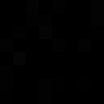

In [374]:
convert(Array{Gray},dct(raw[1:8,1:8] .- 0.5))

In [375]:
dct(oneGS[1:8,1:8])

8×8 Matrix{Float64}:
  2.32059       0.0           0.0190854    …  -0.0025996     0.0
  0.0          -0.0247421     0.0              0.0           0.00204881
 -0.0275214     0.0          -0.0282836       -0.00028715    0.0
  0.0           0.00176166    0.0              0.0           0.0011358
 -0.000980392   0.0          -0.000530584      0.00128094    0.0
  0.0           0.000824988   0.0          …   0.0          -0.0010113
 -0.00239544    0.0           0.00167363       0.000832591   0.0
  0.0          -0.00129845    0.0              0.0          -0.000313136

In [485]:
qMatrix(75)

8×8 Matrix{Float64}:
  8.0   6.0   5.0   8.0  12.0  20.0  26.0  31.0
  6.0   6.0   7.0  10.0  13.0  29.0  30.0  28.0
  7.0   7.0   8.0  12.0  20.0  29.0  35.0  28.0
  7.0   9.0  11.0  15.0  26.0  44.0  40.0  31.0
  9.0  11.0  19.0  28.0  34.0  55.0  52.0  39.0
 12.0  18.0  28.0  32.0  41.0  52.0  57.0  46.0
 25.0  32.0  39.0  44.0  52.0  61.0  60.0  51.0
 36.0  46.0  48.0  49.0  56.0  50.0  52.0  50.0

In [586]:
using Printf

In [587]:
y = 2.3
"I'm long: $y, but I'm alright: $(@sprintf("%.2f", y))"

"I'm long: 2.3, but I'm alright: 2.30"

In [588]:
function coeff_hist(img, isGray, colour, m, n)
    if isGray
        coeffs = dct_coeffs(img,m,n)
    else
        coeffs = dct_coeffs(colour.(img),m,n)
    end
    coeffs = [x for x in coeffs if abs(x) < 25]
    graph = stephist(abs.(coeffs), bins=500, xlabel="Magnitude of coefficient", label="m=$m, n=$n")
    
    return graph
end;

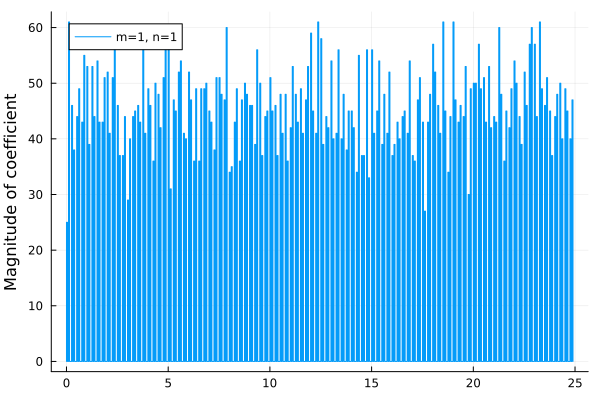

In [589]:
coeff_hist(raw,true,0,1,1)

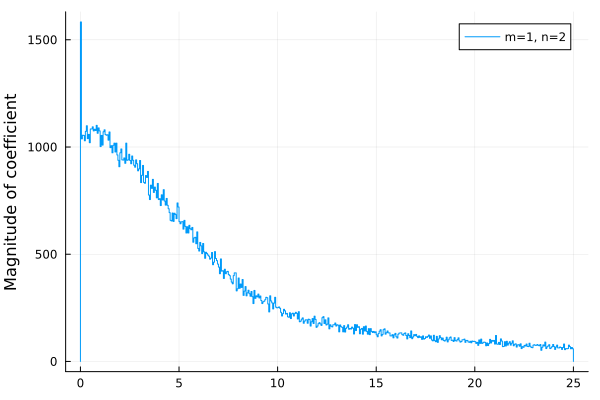

In [590]:
coeff_hist(raw,true,0,1,2)

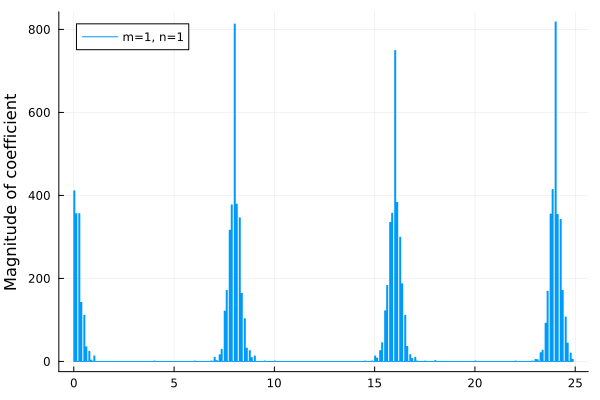

In [591]:
coeff_hist(oneGS,true,0,1,1)

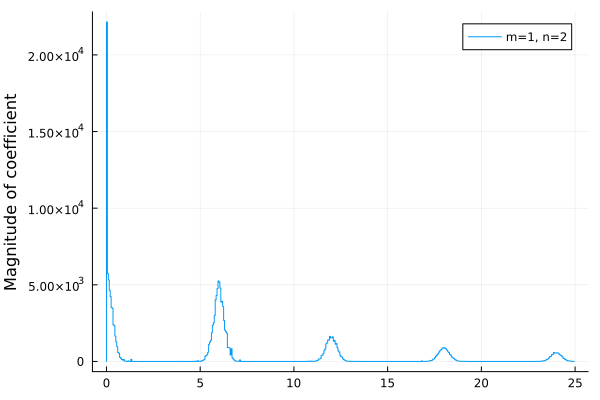

In [592]:
coeff_hist(oneGS,true,0,1,2)

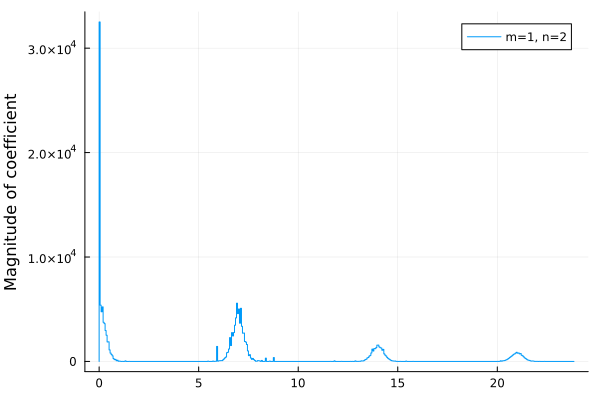

In [593]:
coeff_hist(oneGS70,true,0,1,2)

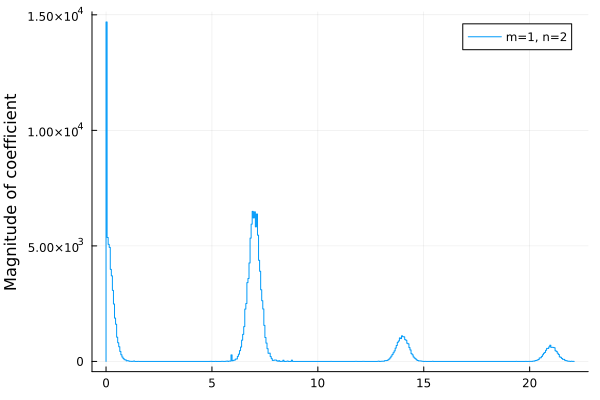

In [594]:
coeff_hist(twoGS7770,true,0,1,2)

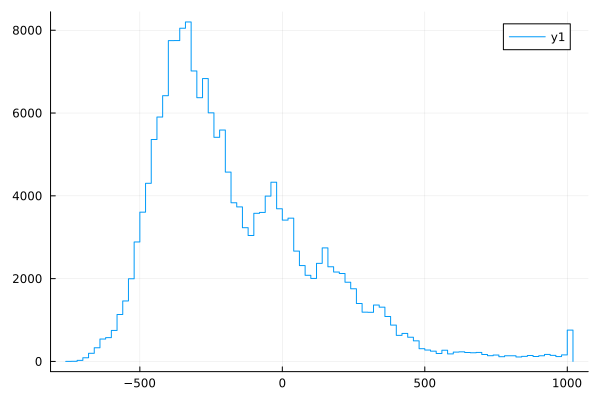

In [513]:
coeff_hist(oneGSHigh,true,0,1,1)

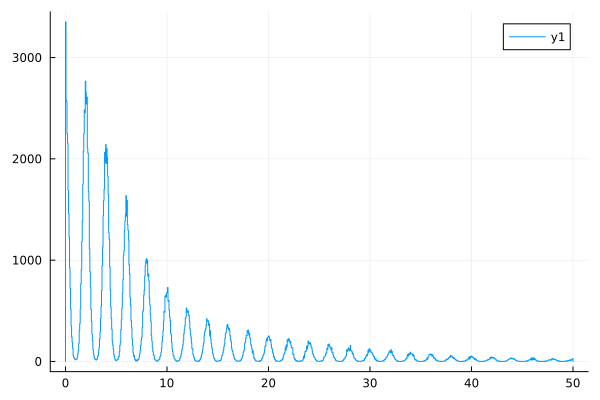

In [514]:
coeff_hist(oneGSHigh,true,0,1,2)

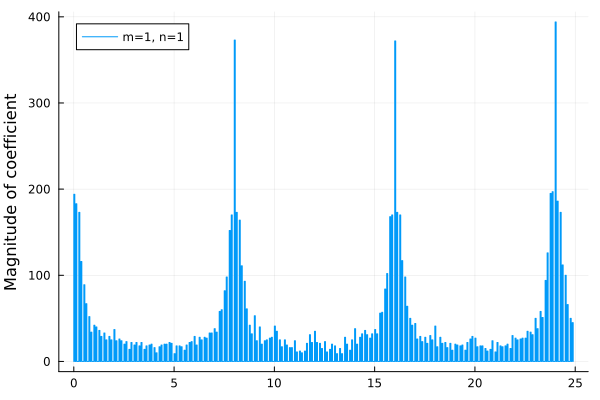

In [599]:
coeff_hist(one,false,red,1,1)

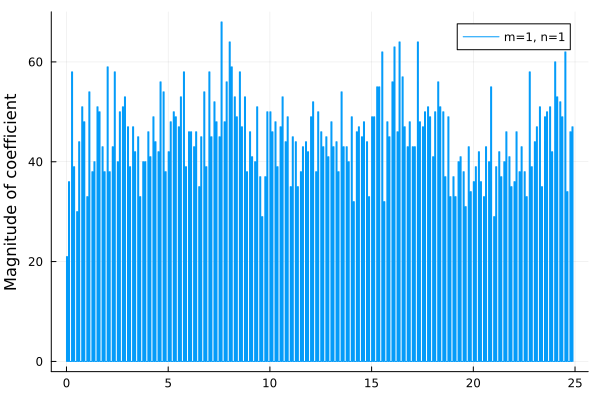

In [600]:
coeff_hist(one,false,blue,1,1)

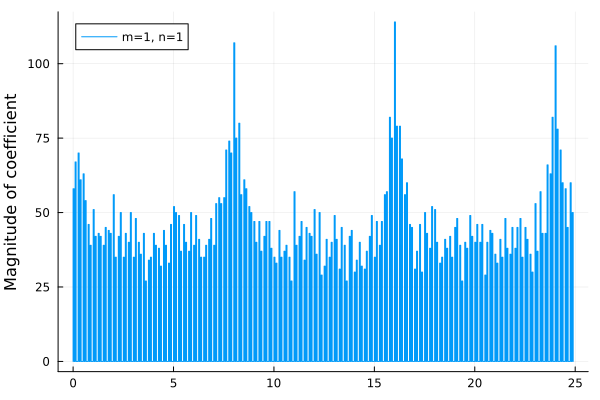

In [601]:
coeff_hist(one,false,green,1,1)

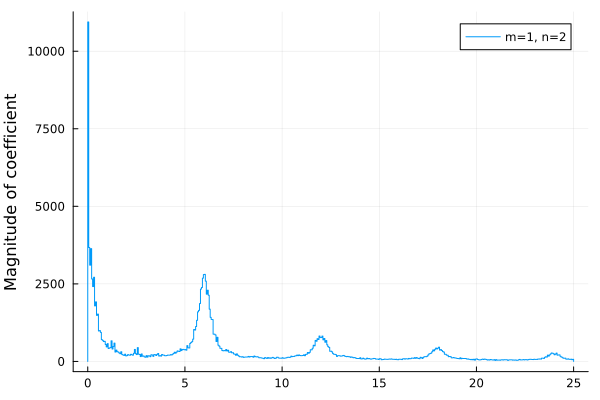

In [602]:
plot(coeff_hist(one,false,red,1,2))

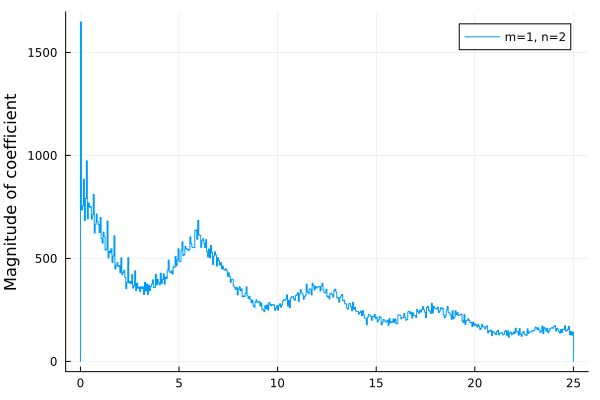

In [603]:
coeff_hist(one,false,blue,1,2)

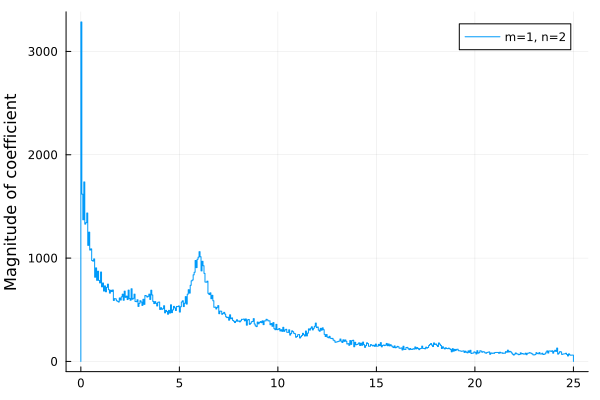

In [604]:
coeff_hist(one,false,green,1,2)

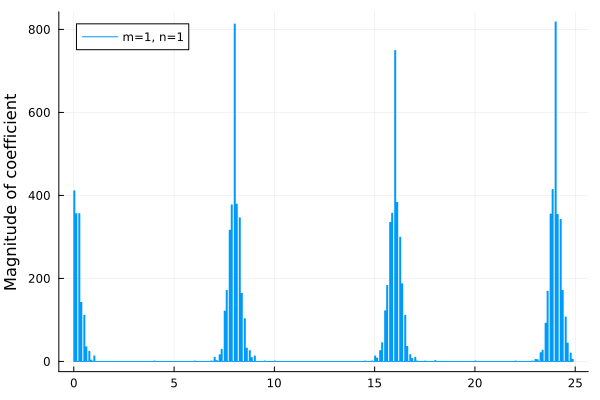

In [605]:
coeff_hist(twoGS7575,true,0,1,1)

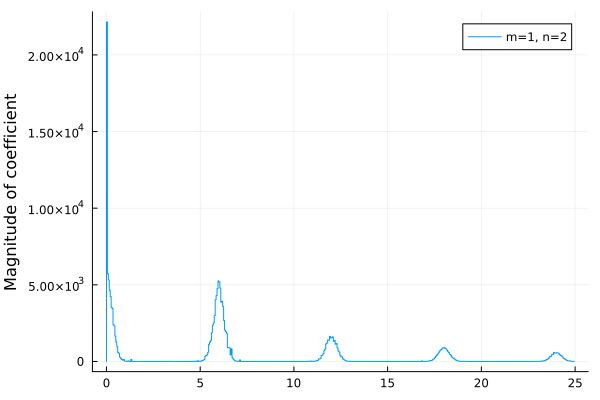

In [606]:
coeff_hist(twoGS7575,true,0,1,2)

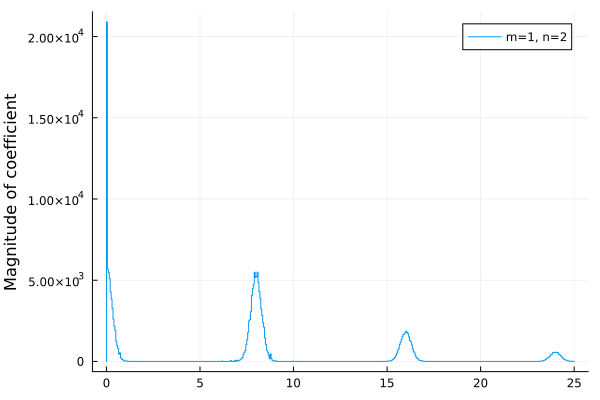

In [607]:
coeff_hist(twoGS7565,true,0,1,2)

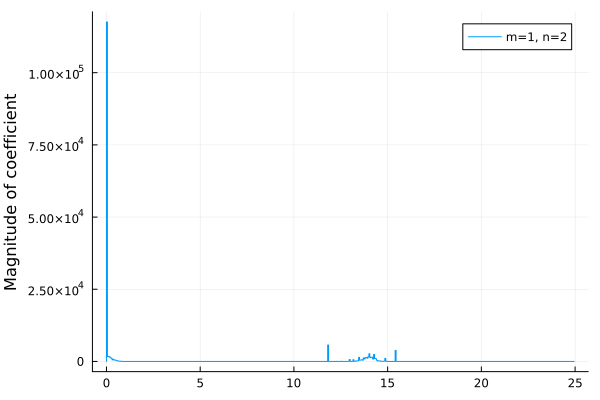

In [608]:
coeff_hist(twoGS7540,true,0,1,2)

In [391]:
Tb =[
    16    11    10    16    24    40    51    61;
    12    12    14    19    26    58    60    55;
    14    13    16    24    40    57    69    56;
    14    17    22    29    51    87    80    62;
    18    22    37    56    68   109   103    77;
    24    35    55    64    81   104   113    92;
    49    64    78    87   103   121   120   101;
    72    92    95    98   112   100   103    99
]

8×8 Matrix{Int64}:
 16  11  10  16   24   40   51   61
 12  12  14  19   26   58   60   55
 14  13  16  24   40   57   69   56
 14  17  22  29   51   87   80   62
 18  22  37  56   68  109  103   77
 24  35  55  64   81  104  113   92
 49  64  78  87  103  121  120  101
 72  92  95  98  112  100  103   99

In [392]:
function qMatrix(Q)
    if (Q < 50)
        S = 5000/Q;
    else
        S = 200 - 2*Q;
    end

    Ts = floor.((S*Tb .+ 50) / 100);
    Ts = [if i != 0 i else 1 end for i in Ts]; # Prevent divide by 0 error
    return Ts
end;

In [393]:
qMatrix(50)

8×8 Matrix{Float64}:
 16.0  11.0  10.0  16.0   24.0   40.0   51.0   61.0
 12.0  12.0  14.0  19.0   26.0   58.0   60.0   55.0
 14.0  13.0  16.0  24.0   40.0   57.0   69.0   56.0
 14.0  17.0  22.0  29.0   51.0   87.0   80.0   62.0
 18.0  22.0  37.0  56.0   68.0  109.0  103.0   77.0
 24.0  35.0  55.0  64.0   81.0  104.0  113.0   92.0
 49.0  64.0  78.0  87.0  103.0  121.0  120.0  101.0
 72.0  92.0  95.0  98.0  112.0  100.0  103.0   99.0

In [394]:
qMatrix(75)

8×8 Matrix{Float64}:
  8.0   6.0   5.0   8.0  12.0  20.0  26.0  31.0
  6.0   6.0   7.0  10.0  13.0  29.0  30.0  28.0
  7.0   7.0   8.0  12.0  20.0  29.0  35.0  28.0
  7.0   9.0  11.0  15.0  26.0  44.0  40.0  31.0
  9.0  11.0  19.0  28.0  34.0  55.0  52.0  39.0
 12.0  18.0  28.0  32.0  41.0  52.0  57.0  46.0
 25.0  32.0  39.0  44.0  52.0  61.0  60.0  51.0
 36.0  46.0  48.0  49.0  56.0  50.0  52.0  50.0

In [395]:
qMatrix(65)

8×8 Matrix{Float64}:
 11.0   8.0   7.0  11.0  17.0  28.0  36.0  43.0
  8.0   8.0  10.0  13.0  18.0  41.0  42.0  39.0
 10.0   9.0  11.0  17.0  28.0  40.0  48.0  39.0
 10.0  12.0  15.0  20.0  36.0  61.0  56.0  43.0
 13.0  15.0  26.0  39.0  48.0  76.0  72.0  54.0
 17.0  25.0  39.0  45.0  57.0  73.0  79.0  64.0
 34.0  45.0  55.0  61.0  72.0  85.0  84.0  71.0
 50.0  64.0  67.0  69.0  78.0  70.0  72.0  69.0

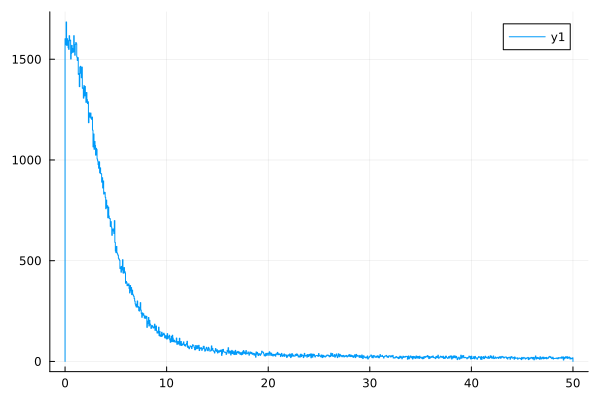

In [472]:
coeff_hist(test1,true,0,1,2)

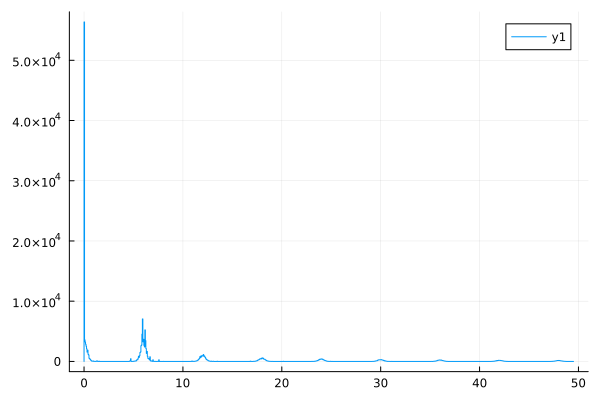

In [473]:
coeff_hist(test2,true,0,1,2)

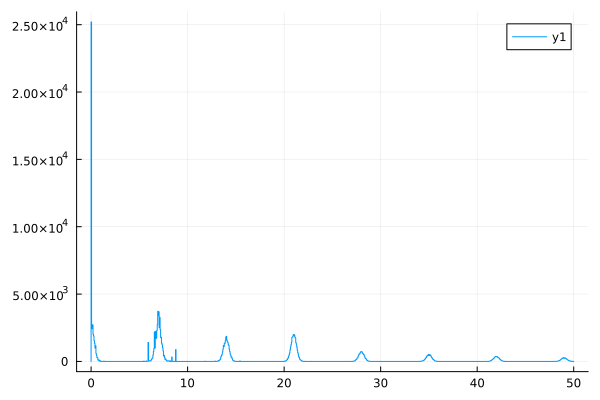

In [474]:
coeff_hist(test3,true,0,1,2)

In [475]:
coeff_hist(test1c,false,red,1,2)

LoadError: ArgumentError: FixedPointNumbers.N0f8 is an 8-bit type representing 256 values from 0.0 to 1.0; cannot represent 153.0

In [ ]:
coeff_hist(test1c,false,red,1,2)

In [598]:
qMatrix(77)

8×8 Matrix{Float64}:
  7.0   5.0   5.0   7.0  11.0  18.0  23.0  28.0
  6.0   6.0   6.0   9.0  12.0  27.0  28.0  25.0
  6.0   6.0   7.0  11.0  18.0  26.0  32.0  26.0
  6.0   8.0  10.0  13.0  23.0  40.0  37.0  29.0
  8.0  10.0  17.0  26.0  31.0  50.0  47.0  35.0
 11.0  16.0  25.0  29.0  37.0  48.0  52.0  42.0
 23.0  29.0  36.0  40.0  47.0  56.0  55.0  46.0
 33.0  42.0  44.0  45.0  52.0  46.0  47.0  46.0

In [597]:
qMatrix(70)

8×8 Matrix{Float64}:
 10.0   7.0   6.0  10.0  14.0  24.0  31.0  37.0
  7.0   7.0   8.0  11.0  16.0  35.0  36.0  33.0
  8.0   8.0  10.0  14.0  24.0  34.0  41.0  34.0
  8.0  10.0  13.0  17.0  31.0  52.0  48.0  37.0
 11.0  13.0  22.0  34.0  41.0  65.0  62.0  46.0
 14.0  21.0  33.0  38.0  49.0  62.0  68.0  55.0
 29.0  38.0  47.0  52.0  62.0  73.0  72.0  61.0
 43.0  55.0  57.0  59.0  67.0  60.0  62.0  59.0

In [609]:
using Statistics

In [612]:
abc = zeros((8,8,2))

8×8×2 Array{Float64, 3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[:, :, 2] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [632]:
abc[:,:,1] .= 5
abc[:,:,:]
mean(abc[:,:,1])

5.0

In [664]:
function dct_coeffs_heatmap(img)
    coeffs = zeros((8,8,190512))
    irange = 1:8:4032-8
    jrange = 1:8:3024-8
    for i = irange
        for j = jrange
            m = Int((i-1)/8)
            n = Int((j-1)/8)
            x = img[i:i+7,j:j+7]
            x .*= 255
            x .-= 128
            coeffs[:,:,(m)*Int(3024/8) + n + 1] = dct(x)
        end
    end
    out = zeros((8,8))
    for i=1:8
        for j=1:8
            out[i, j] = mean(abs.(coeffs[i,j,:]))
        end
    end
    return heatmap(1:8, 1:8, log.(out), c=cgrad([:blue, :cyan]), size = (400, 400), xmirror = true, xlabel="m", ylabel="n", colorbar_title="Log(Mean(Abs(Coefficients)))", yflip = true)
end

dct_coeffs_heatmap (generic function with 1 method)

In [669]:
dct_coeffs_heatmap(raw)
savefig("Plots/energy_compacting.png")

"/mnt/c/Users/Naunidh/iCloudDrive/Documents/DSP/Ass4/Plots/energy_compacting.png"